# Lead Scoring Case Study


An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead.

The aim here is to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.

## 1. Import Required libraries

In [930]:
#Importing data-related libraries
import numpy as np
import pandas as pd

#Importing graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Importing ML Related libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

In [931]:
#Suppressing unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Importing Data

In [932]:
#Read data from CSV and display the top 5 rows
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 3. Exploratory Data Analysis and Preparation

In [933]:
#Let us find out the number of rows and columns
leads.shape

(9240, 37)

In [934]:
#As can be seen from above, we have 9,240 rows of data and 37 columns. Let us explore column types in more detail
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Looking at Non-Null count columns and knowing that there are a total of 9240 rows, it looks like a lot of columns have considerable Null values which can cause problems. Let us analyse further and find out the % of null values in each of the columns.

In [935]:
percent_missing = round(leads.isnull().sum() * 100 / len(leads),2)
percent_missing.sort_values(ascending = False)


Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

Some of the columns have almost half of the data as null. Let us drop all columns with more than 40% NULL data.

In [936]:
leads.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],axis=1,inplace=True)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


Now that we have taken care of columns which do not contribute value due to NULLs, let us analyze the values in the columns further

In [937]:
leads.nunique().sort_values(ascending=True)

Receive More Updates About Our Courses              1
I agree to pay the amount through cheque            1
Magazine                                            1
Get updates on DM Content                           1
Update me on Supply Chain Content                   1
Newspaper Article                                   2
Search                                              2
A free copy of Mastering The Interview              2
Digital Advertisement                               2
Through Recommendations                             2
Newspaper                                           2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
X Education Forums                                  2
What matters most to you in choosing a course       3
Lead Origin                                         5
Lead Profile                                        6
What is your current occupat

There seem to be several columns with only one unique value. These do not contuibute any meaningful information for our model. Hence let us drop the columns with only one unique value.

In [938]:
leads = leads.loc[:,leads.apply(pd.Series.nunique) != 1]
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Interested in other courses,Select,Select,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Ringing,Select,Select,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Ringing,Select,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Will revert after reading the email,Select,Mumbai,No,Modified


We are now left with 27 columns. Let us now check to see if we can differentiate between categorical and continuous variables.

In [939]:
leads.nunique().sort_values(ascending=False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
How did you hear about X Education                 10
City                                                7
What is your current occupation                     6
Lead Profile                                        6
Lead Origin                                         5
What matters most to you in choosing a course       3
Converted                                           2
Do Not Call                 

For the above, it is clear that Prospect ID and Lead Number are just identifying features and are unique to each row. These can be dropped. We will come back to this at a later point of time.

Additionally, by looking at the data dictionary and value counts, it is also clear that all of the variables other than Total Time Spend on Website, Page views per visit and total visits are categorical in nature.

### Categorical variables Analysis

In [940]:
#Let us start with the largest categorical variable - Country
leads["Country"].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

Taking a careful look at the above, NULL value forms the second largest section in the data distribution. However, if we are to impute the missing values with the mode, i.e. india, the data would look like below

In [941]:
leads["Country"].fillna(value='India', inplace=True)
leads["Country"].value_counts(dropna=False, normalize=True)

India                   0.968939
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
South Africa            0.000433
Nigeria                 0.000433
Germany                 0.000433
Kuwait                  0.000433
Canada                  0.000433
Sweden                  0.000325
China                   0.000216
Asia/Pacific Region     0.000216
Uganda                  0.000216
Bangladesh              0.000216
Italy                   0.000216
Belgium                 0.000216
Netherlands             0.000216
Ghana                   0.000216
Philippines             0.000216
Russia                  0.000108
Switzerland             0.000108
Vietnam   

97% of the data in Country column belongs to one value. This is abnormally skewed and this column can be dropped.

In [942]:
leads.drop('Country', axis=1,inplace=True)

In [943]:
#Let us now begin with the second biggest categorical variable - Tags
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

Null values form the highest number of values present in the column. Hence, Null here can not be imputed with other values. Instead, let us replace Null by a new tag: Not Specified

In [944]:
leads["Tags"].fillna(value='Not Specified', inplace=True)
leads["Tags"].value_counts(dropna=False, normalize=True)

Not Specified                                        0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

In [945]:
#We have too many values. For ease of analysis, let us bucket all of the values occuring less than 2% into one category - Other Tags
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP','in touch with EINS','Diploma holder (Not Eligible)','Approached upfront','Graduation in progress','number not provided','opp hangup','Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch','Recognition issue (DEC approval)','Want to take admission but has financial problems','University not recognized','Not doing further education','invalid number','wrong number given','Interested  in full time MBA', 'Other_Tags','Lost to EINS'], 'Other_Tags')
leads["Tags"].value_counts(dropna=False, normalize=True)

Not Specified                          0.362879
Will revert after reading the email    0.224242
Ringing                                0.130195
Other_Tags                             0.091991
Interested in other courses            0.055519
Already a student                      0.050325
Closed by Horizzon                     0.038745
switched off                           0.025974
Busy                                   0.020130
Name: Tags, dtype: float64

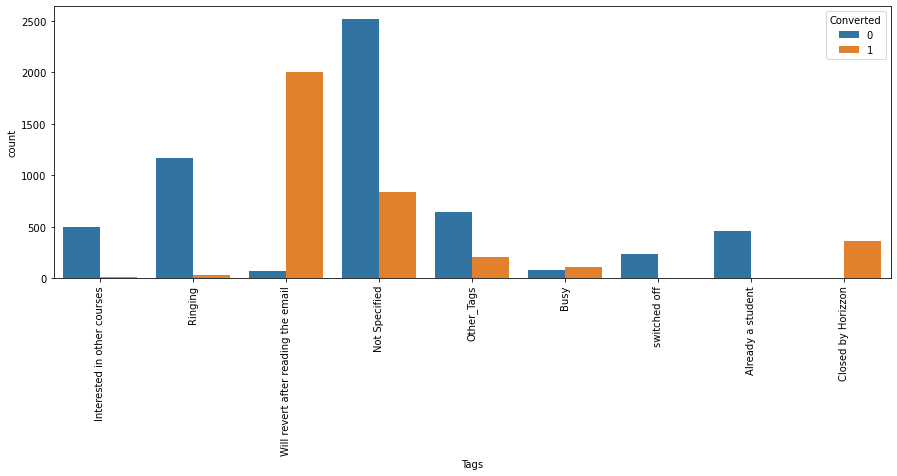

In [946]:
#Let us visualize the variable based against converted values
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [947]:
#Let us now move on to the third largest categorical variable - Lead Source
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

We have some data in-accuracies. We have 2 entries for Google. We also have 36 Null values. 
Let us fix the inaccuracies and also group values with low number of occurances to one bucket.

In [948]:
#replacing Nan Values and combining low frequency values
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')       

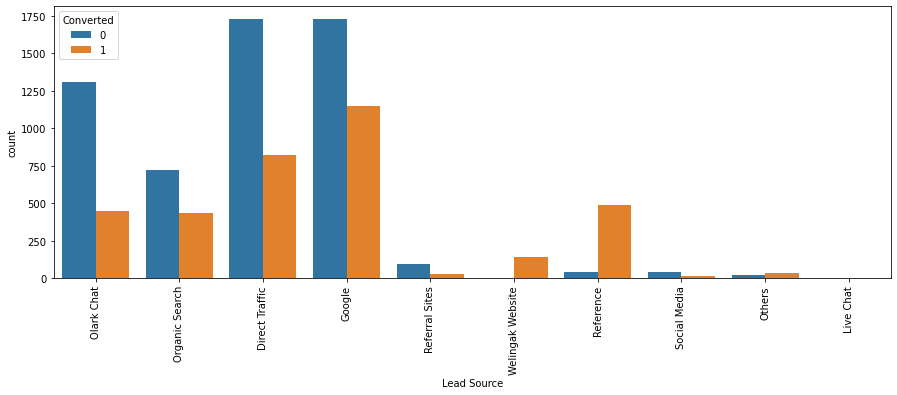

In [949]:
#Let us visualize count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Google and Direct Traffic respectively generate the most leads as well as conversions.

In [950]:
#Moving on to the next categorical variable - Specialization
leads['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [951]:
#The first two values above seems to be 'Select' which appears to be a default selection and not a valid value and Nukk. Let us combine these two values together.
leads['Specialization'] = leads['Specialization'].replace([np.nan,'Select'], 'Not Specified')

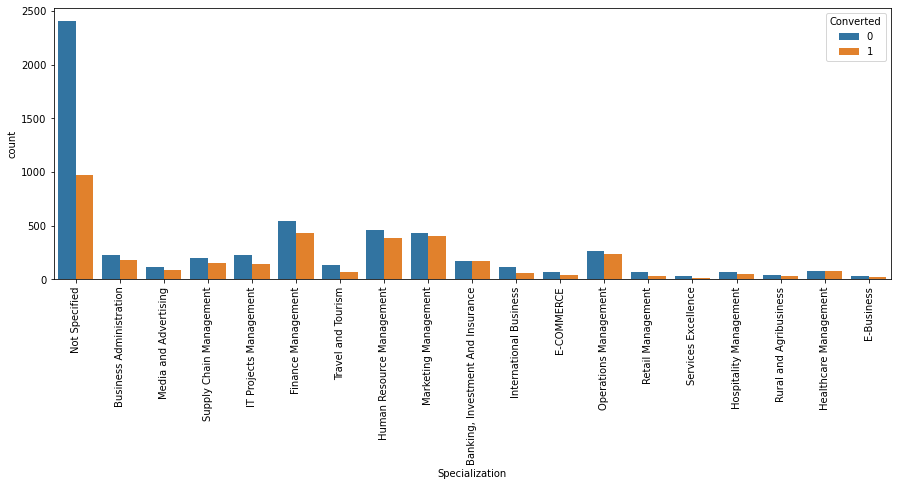

In [952]:
#Visualizing the column:

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


It appears that majority of the people have not mentioned their specialization. However, among those who have provided their specialization, most of them belong to some form of Management groups.

In [953]:
#combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'] ,'Management_Specializations')  

In [954]:
#Analyzing Last Activity
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [955]:
#replacing null Values and combining low frequency values
leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow','Had a Phone Conversation'],'Others')
leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [956]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

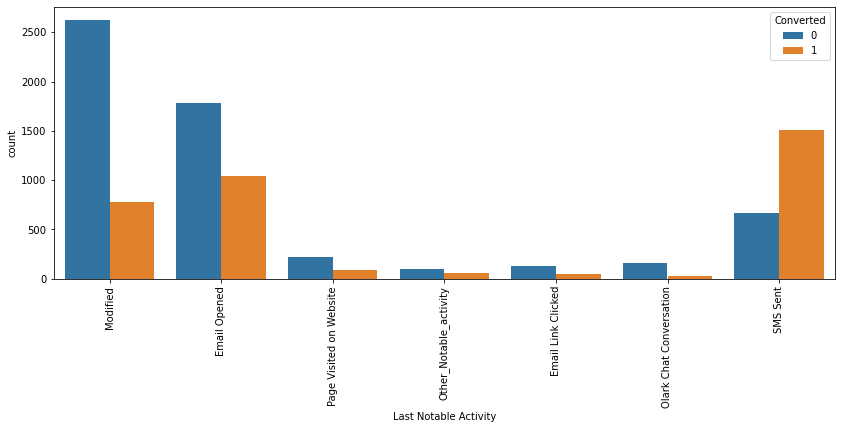

In [957]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable','Unsubscribed','Email Bounced','Resubscribed to emails','View in browser link Clicked','Approached upfront','Form Submitted on Website', 'Email Received'],'Other_Notable_activity')

#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [958]:
#checking value counts of "City" column

leads['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

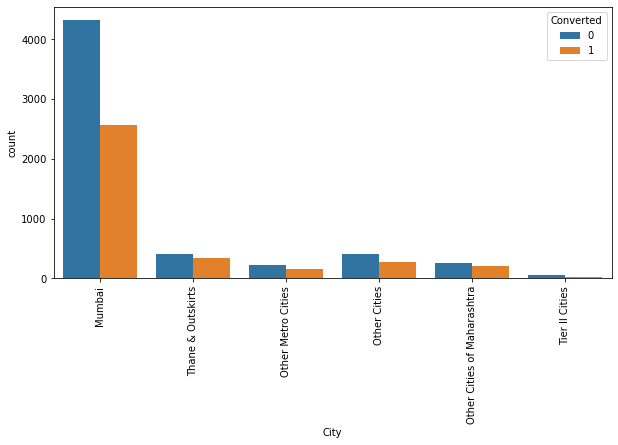

In [959]:
#Replacing Null and default Select with the Mode.
leads["City"].fillna(value='Mumbai', inplace=True)
leads['City'] = leads['City'].replace('Select','Mumbai')

#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [960]:
#Current occupation

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

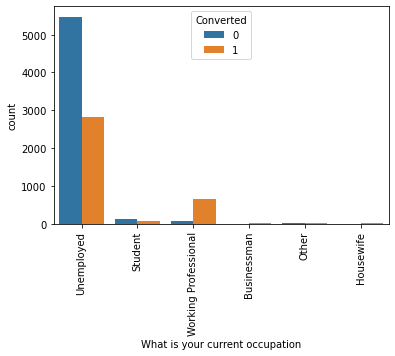

In [961]:
#Replacing Null and default Select with the Mode.
leads["What is your current occupation"].fillna(value='Unemployed', inplace=True)

#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

1. More working progessionals are converted as compared to not converted.
2. Majority of the leads are unemployed

In [962]:
#checking value counts for "What matters most to you in choosing a course"

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [963]:
#If Nulls were to be added to the mode, we have 3 values out of 9.5 thousand which is different from the mode and this columns is not statistically significant. Hence, let us drop this column
leads.drop('What matters most to you in choosing a course', axis=1,inplace=True)

In [964]:
#checking value counts for "What matters most to you in choosing a course"

leads['Lead Profile'].value_counts(dropna=False, normalize=True)

Select                         0.448701
NaN                            0.293182
Potential Lead                 0.174567
Other Leads                    0.052706
Student of SomeSchool          0.026082
Lateral Student                0.002597
Dual Specialization Student    0.002165
Name: Lead Profile, dtype: float64

In [965]:
#Over 75% of the data in the above column does not contribute any significant information statistically (same as null)  and hence this column can be dropped
leads.drop('Lead Profile', axis=1,inplace=True)

In [966]:
#checking value counts for "What matters most to you in choosing a course"

leads['How did you hear about X Education'].value_counts(dropna=False, normalize=True)

Select                   0.545779
NaN                      0.238853
Online Search            0.087446
Word Of Mouth            0.037662
Student of SomeSchool    0.033550
Other                    0.020130
Multiple Sources         0.016450
Advertisements           0.007576
Social Media             0.007251
Email                    0.002814
SMS                      0.002489
Name: How did you hear about X Education, dtype: float64

In [967]:
#Over 78% of the data in the above column does not contribute any significant information statistically (Same as null) and hence this column can be dropped
leads.drop('How did you hear about X Education', axis=1,inplace=True)

We have now analyzed a considerable number of categorical columns. Let us check for null values once again

In [968]:
percent_missing = round(leads.isnull().sum() * 100 / len(leads),2)
percent_missing.sort_values(ascending = False)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Prospect ID                               0.00
Search                                    0.00
A free copy of Mastering The Interview    0.00
City                                      0.00
Tags                                      0.00
Through Recommendations                   0.00
Digital Advertisement                     0.00
Newspaper                                 0.00
X Education Forums                        0.00
Newspaper Article                         0.00
Specialization                            0.00
What is your current occupation           0.00
Lead Number                               0.00
Last Activity                             0.00
Total Time Spent on Website               0.00
Converted                                 0.00
Do Not Call                               0.00
Do Not Email                              0.00
Lead Source                               0.00
Lead Origin  

In [969]:
#Now that we have a max of 3% rows which may/may not have Null values, let us drop all rows which have Nan Values. 
leads = leads.dropna()

In [970]:
#Verify Null values
percent_missing = round(leads.isnull().sum() * 100 / len(leads),2)
percent_missing.sort_values(ascending = False)

Prospect ID                               0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
City                                      0.0
Tags                                      0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Search                                    0.0
Specialization                            0.0
Lead Number                               0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
Lead Source                               0.0
Lead Origin                       

In [971]:
#Lead Origin
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

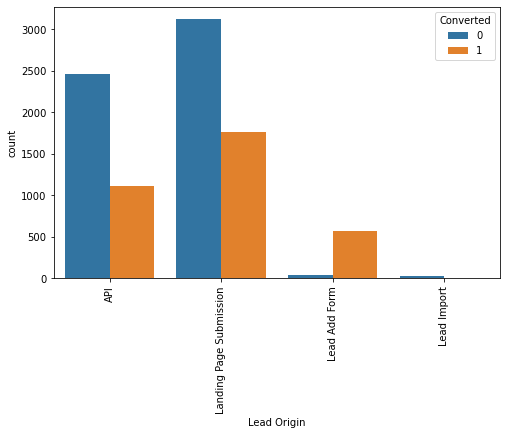

In [972]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

1. Maximum number of leads seem to be coming from API and Landing page submission
2. %Conversion of Lead Add Form is extremely high

In [973]:
#Do not call - Checking value distribution
leads['Do Not Call'].value_counts(dropna=False)


No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [974]:
#This columns is imbalanced and statistically not significant and hence can be dropped
leads.drop('Do Not Call', axis=1,inplace=True)

In [975]:
#Do not call - visualizing count of Variable based on Converted value
leads['Do Not Email'].value_counts(dropna=False)


No     8379
Yes     724
Name: Do Not Email, dtype: int64

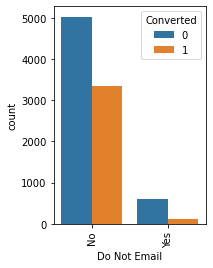

In [976]:
#Visualize the column
ax1=plt.subplot(1, 2, 2)
ax1=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [977]:
#Search - Checking value distribution
leads['Search'].value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [978]:
#This columns is imbalanced and statistically not significant and hence can be dropped
leads.drop('Search', axis=1,inplace=True)

In [979]:
#Newspaper Article - Checking value distribution
leads['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [980]:
#This columns is imbalanced and statistically not significant and hence can be dropped
leads.drop('Newspaper Article', axis=1,inplace=True)

In [981]:
#Digital Addvertisement - Checking value distribution
leads['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [982]:
#This columns is imbalanced and statistically not significant and hence can be dropped
leads.drop('Digital Advertisement', axis=1,inplace=True)

In [983]:
#Through Recommendations - Checking value distribution
leads['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [984]:
#This columns is imbalanced and statistically not significant and hence can be dropped
leads.drop('Through Recommendations', axis=1,inplace=True)

In [985]:
#X Education Forums - Checking value distribution
leads['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [986]:
#This columns is imbalanced and statistically not significant and hence can be dropped
leads.drop('X Education Forums', axis=1,inplace=True)

In [987]:
#X Education Forums - Checking value distribution
leads['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [988]:
#This columns is imbalanced and statistically not significant and hence can be dropped
leads.drop('Newspaper', axis=1,inplace=True)

In [989]:
#A free copy of Mastering the Interview - Checking value distribution
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

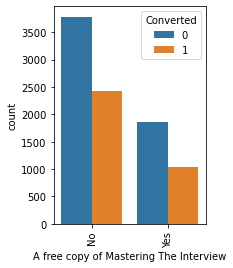

In [990]:
# Visualize the column
ax1=plt.subplot(1, 2, 2)
ax1=sns.countplot(leads['A free copy of Mastering The Interview'], hue=leads.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [991]:
#Let us take a look at the remaining columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Do Not Email                            9103 non-null   object 
 5   Converted                               9103 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9103 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9103 non-null   object 
 10  Specialization                          9103 non-null   obje

### Continuous Variable Analysis

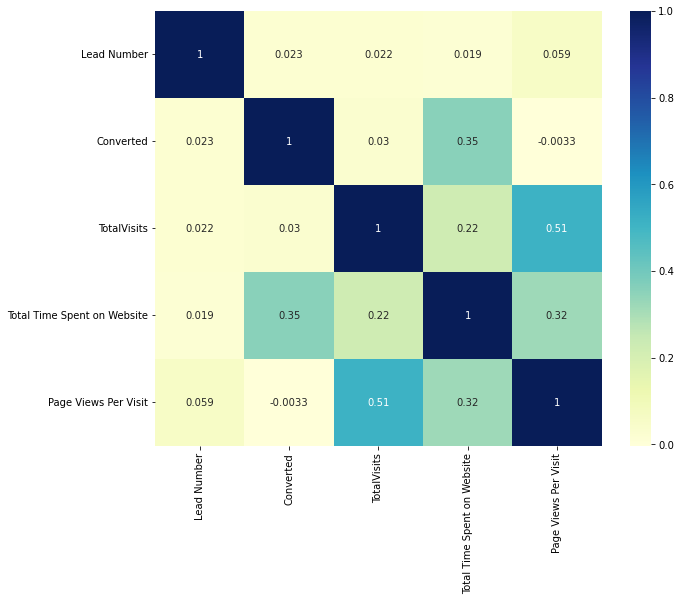

In [992]:
#Let us first check the correlation of the numeric values in the dataset

plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

Total visits and page views per visit seem to have the strongest correlation. Let us take a quick look at each of the numerical variables

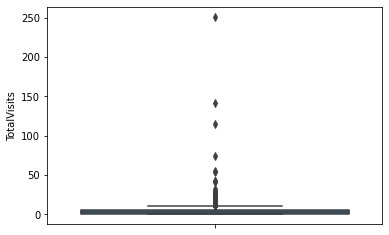

In [993]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [994]:
#Data seems to be affected by outliers. checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

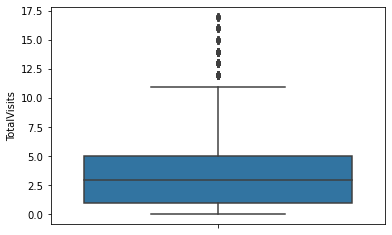

In [995]:
#Outlier Treatment: Mean of the data is 3. Remove top & bottom 1% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

This is much more acceptable.

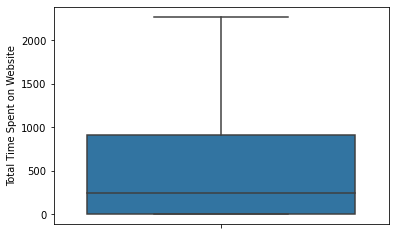

In [996]:
#Total Time Spent on the website

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

There appear to be no outliers at all and this column is acceptable as is.

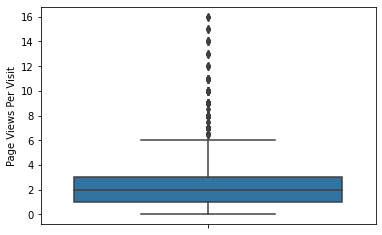

In [997]:
#Page views per visit

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [998]:
#Data seems to be affected by outliers. checking percentile values for "Total Visits"

leads['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

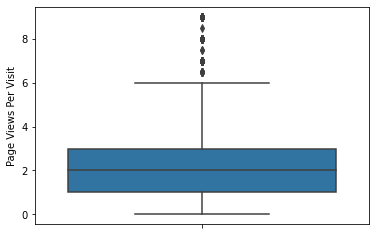

In [999]:
#Outlier Treatment: Mean of the data is 2.3. Remove top & bottom 1% of the Column Outlier values

Q3 = leads["Page Views Per Visit"].quantile(0.99)
leads = leads[(leads["Page Views Per Visit"] <= Q3)]
Q1 = leads["Page Views Per Visit"].quantile(0.01)
leads = leads[(leads["Page Views Per Visit"] >= Q1)]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

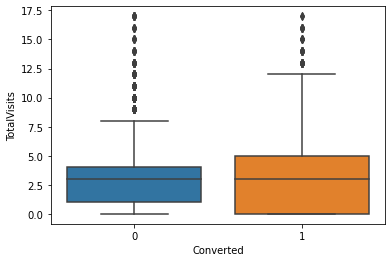

In [1000]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

1. Median for converted and not converted leads are the close.
2. Nothng conclusive can be said on the basis of Total Visits

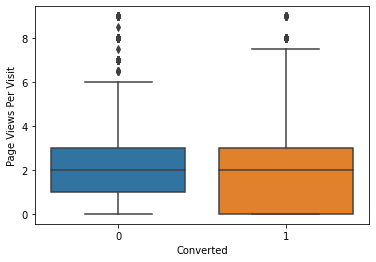

In [1001]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

1. Median for converted and not converted leads are the close.
2. Nothng conclusive can be said on the basis of Total Visits

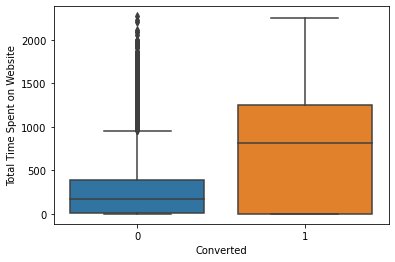

In [1002]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

Leads spending more time on the website are more likely to be converted. 

### Dummy Variable Creation for Categorical Variables

In [1003]:
#Create a list of categorical columns

cat_columns= leads.select_dtypes(include=['object']).columns
cat_columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [1004]:
# Creating Dummy variables for Yes/No variables

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [1005]:
#Adding dummy variables to all the columns with all major significant values
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],1)

In [1006]:
#Creating dummy variable to Specialization and dropping the least significant value
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [1007]:
#Creating dummy variable to Lead Source and dropping the least significant value
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [1008]:
#Creating dummy variable to Last Activity and dropping the least significant value
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [1009]:
#Creating dummy variable to Last Notable Activity and dropping the least significant value
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [1010]:
#Creating dummy variable to Tags and dropping the least significant value
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [1011]:
#dropping the original columns after dummy variable creation

leads.drop(cat_columns,1,inplace = True)

In [1012]:
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Going back to initial part of the script, we had identified Prospect ID and Lead numbers as unique columns which need to be dropped.
Prospect ID has already been deleted. Let us now finally delete Lead number and check out final dataframe.

In [1013]:
leads_model = leads.drop('Lead Number', axis=1)
leads_model.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Model Building

### Train-Test Split

In [1014]:
y = leads_model.pop('Converted')
X = leads_model
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,305,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [1015]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1016]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1017]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

### Scaling of Data

In [1018]:
scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


### Feature Elimination

In [1019]:
# running RFE with 15 variables as output
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [1020]:
rfe.support_

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False,  True, False,  True, False,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
        True,  True,  True])

In [1021]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 23),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('What is your current occupation_Housewife', False, 29),
 ('What is your current occupation_Other', False, 8),
 ('What is your current occupation_Student', False, 30),
 ('What is your current occupation_Unemployed', False, 31),
 ('What is your current occupation_Working Professional', False, 4),
 ('City_Other Cities', False, 38),
 ('City_Other Cities of Maharashtra', False, 37),
 ('City_Other Metro Cities', False, 27),
 ('City_Thane & Outskirts', False, 36),
 ('City_Tier II Cities', False, 34),
 ('Specialization_Banking, Investment And Insurance', False, 15),
 ('Specialization_Business Administration', False, 42),
 ('Specialization_E-Business', False, 41),
 ('Specialization_E-COMMERCE', False, 28),
 ('Specialization_International Business', Fa

In [1022]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Specialization_Travel and Tourism',
       'Lead Source_Direct Traffic', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off'],
      dtype='object')

In [1023]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1628.0
Date:                Tue, 15 Nov 2022   Deviance:                       3256.1
Time:                        16:42:07   Pearson chi2:                 9.03e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.2877      0.069    -18.758      0.000      -1.422      -1.153
Lead Origin_Lead Add Form                    1.1982      0.381      3.141      0.002       0.451       1.946
Specialization_Travel and Tourism           -1.4201      0.382     -3.721      0.000      -2.168      -0.672
Lead Source_Direct Traffic                  -0.4288      0.110     -3.907      0.000      -0.644      -0.214
Lead Source_Organic Search                  -0.1062      0.142     -0.748      0.455      -0.384       0.172
Lead Source_Referral Sites                  -0.4679      0.427     -1.096      0.273      -1.305       0.369
Lead Source_Welingak Website                 3.8353      1.085      3.536      0.000       1.710       5.961
Last Activity_Email Bounced                 -1.6499      0.387     -4.260      0.000      -2.409      -0.891
Last Activity_Olark Chat Conversation       -1.6076      0.200     -8.034      0.000      -2.000      -1.215
Last Notable Activity_SMS Sent               2.2336      0.111     20.085      0.000       2.016       2.452
Tags_Already a student                      -3.3315      0.713     -4.675      0.000      -4.728      -1.935
Tags_Closed by Horizzon                      6.5070      1.009      6.450      0.000       4.530       8.484
Tags_Interested in other courses            -2.2156      0.368     -6.026      0.000      -2.936      -1.495
Tags_Ringing                                -3.3510      0.229    -14.656      0.000      -3.799      -2.903
Tags_Will revert after reading the email     4.4452      0.172     25.783      0.000       4.107       4.783
Tags_switched off                           -3.8940      0.594     -6.554      0.000      -5.058      -2.730
============================================================================================================
"""

Let us drop the Lead Source_Organic Search column as its p-value is the highest

In [1024]:
#dropping column with high p-value

col = col.drop('Lead Source_Organic Search',1)

In [1025]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1628.3
Date:                Tue, 15 Nov 2022   Deviance:                       3256.6
Time:                        16:42:07   Pearson chi2:                 9.16e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3061      0.064    -20.317      0.000      -1.432      -1.180
Lead Origin_Lead Add Form                    1.2190      0.380      3.204      0.001       0.473       1.965
Specialization_Travel and Tourism           -1.4534      0.379     -3.837      0.000      -2.196      -0.711
Lead Source_Direct Traffic                  -0.4083      0.106     -3.840      0.000      -0.617      -0.200
Lead Source_Referral Sites                  -0.4488      0.426     -1.053      0.292      -1.284       0.387
Lead Source_Welingak Website                 3.8337      1.085      3.535      0.000       1.708       5.960
Last Activity_Email Bounced                 -1.6548      0.387     -4.280      0.000      -2.413      -0.897
Last Activity_Olark Chat Conversation       -1.5956      0.200     -7.996      0.000      -1.987      -1.204
Last Notable Activity_SMS Sent               2.2307      0.111     20.079      0.000       2.013       2.448
Tags_Already a student                      -3.3298      0.713     -4.673      0.000      -4.726      -1.933
Tags_Closed by Horizzon                      6.4987      1.009      6.443      0.000       4.522       8.476
Tags_Interested in other courses            -2.2176      0.368     -6.032      0.000      -2.938      -1.497
Tags_Ringing                                -3.3538      0.229    -14.672      0.000      -3.802      -2.906
Tags_Will revert after reading the email     4.4431      0.172     25.774      0.000       4.105       4.781
Tags_switched off                           -3.9064      0.594     -6.577      0.000      -5.071      -2.742
============================================================================================================
"""

Let us drop the Lead Source_Referral Sites Search column as its p-value is the high

In [1026]:
#dropping Lead Source_Referral Sites
col = col.drop('Lead Source_Referral Sites',1)

In [1027]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1628.9
Date:                Tue, 15 Nov 2022   Deviance:                       3257.8
Time:                        16:42:08   Pearson chi2:                 9.17e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3146      0.064    -20.583      0.000      -1.440      -1.189
Lead Origin_Lead Add Form                    1.2268      0.380      3.225      0.001       0.481       1.972
Specialization_Travel and Tourism           -1.4528      0.378     -3.846      0.000      -2.193      -0.712
Lead Source_Direct Traffic                  -0.4008      0.106     -3.776      0.000      -0.609      -0.193
Lead Source_Welingak Website                 3.8336      1.085      3.534      0.000       1.708       5.959
Last Activity_Email Bounced                 -1.6516      0.386     -4.274      0.000      -2.409      -0.894
Last Activity_Olark Chat Conversation       -1.5916      0.200     -7.968      0.000      -1.983      -1.200
Last Notable Activity_SMS Sent               2.2349      0.111     20.138      0.000       2.017       2.452
Tags_Already a student                      -3.3259      0.713     -4.667      0.000      -4.722      -1.929
Tags_Closed by Horizzon                      6.4999      1.009      6.444      0.000       4.523       8.477
Tags_Interested in other courses            -2.2481      0.367     -6.117      0.000      -2.968      -1.528
Tags_Ringing                                -3.3528      0.229    -14.668      0.000      -3.801      -2.905
Tags_Will revert after reading the email     4.4401      0.172     25.771      0.000       4.102       4.778
Tags_switched off                           -3.9112      0.594     -6.585      0.000      -5.075      -2.747
============================================================================================================
"""

Since the p-values of all the columns are now in acceptable range, let us check the VIF to see if there is any correlation concerns

In [1028]:
# Checking VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Welingak Website,1.33
8,Tags_Closed by Horizzon,1.14
4,Last Activity_Email Bounced,1.04
12,Tags_switched off,1.03
1,Specialization_Travel and Tourism,1.02
0,Lead Origin_Lead Add Form,0.68
5,Last Activity_Olark Chat Conversation,0.27
7,Tags_Already a student,0.27
9,Tags_Interested in other courses,0.27
6,Last Notable Activity_SMS Sent,0.22


There are no concerns with VIF values. Hence everything is in order and we can now move forward to the next steps with model 3.

In [1029]:
# Generate the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.080734
4696    0.055557
3274    0.715116
2164    0.005741
1667    0.957932
7024    0.211724
8018    0.051849
778     0.211724
6942    0.051849
4440    0.152475
dtype: float64

In [1030]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08073379, 0.05555742, 0.7151158 , 0.00574148, 0.95793201,
       0.21172439, 0.05184906, 0.21172439, 0.05184906, 0.15247474])

In [1031]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.080734,9196
1,0,0.055557,4696
2,0,0.715116,3274
3,0,0.005741,2164
4,1,0.957932,1667


In [1032]:
#Convert decimals into 0 or 1. Let us take 0.5 as threshold
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.080734,9196,0
1,0,0.055557,4696,0
2,0,0.715116,3274,1
3,0,0.005741,2164,0
4,1,0.957932,1667,1


In [1033]:
# Creating a confusion matrix between predicted scores and actual scores 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3698  184]
 [ 422 1963]]


In [1034]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9033030157970321


In [1035]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1036]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8230607966457023

In [1037]:
# Let us calculate specificity
TN / float(TN+FP)

0.9526017516743946

In [1038]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04739824832560536


In [1039]:
# positive predictive value 
print (TP / float(TP+FP))

0.9142990218910108


In [1040]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8975728155339806


### Plotting the ROC Curve

In [1041]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1042]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

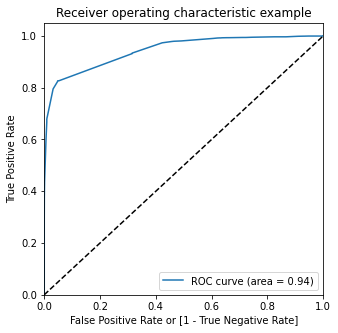

In [1043]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.94 indicating a good predictive model.

### Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value.

In [1044]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.080734,9196,0,1,0,0,0,0,0,0,0,0,0
1,0,0.055557,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.715116,3274,1,1,1,1,1,1,1,1,1,0,0
3,0,0.005741,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.957932,1667,1,1,1,1,1,1,1,1,1,1,1


In [1045]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.727780  0.973585  0.576765
0.2   0.2  0.779480  0.933753  0.684699
0.3   0.3  0.903782  0.826834  0.951056
0.4   0.4  0.903941  0.826415  0.951571
0.5   0.5  0.903303  0.823061  0.952602
0.6   0.6  0.903303  0.823061  0.952602
0.7   0.7  0.902346  0.795388  0.968058
0.8   0.8  0.873943  0.685954  0.989438
0.9   0.9  0.867720  0.667505  0.990726


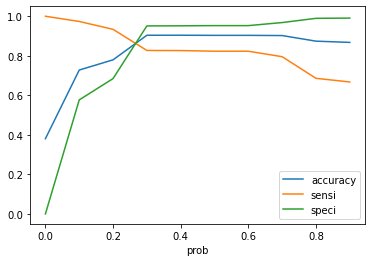

In [1046]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [1047]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.080734,9196,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.055557,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.715116,3274,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.005741,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.957932,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [1048]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.080734,9196,0,8
1,0,0.055557,4696,0,6
2,0,0.715116,3274,1,72
3,0,0.005741,2164,0,1
4,1,0.957932,1667,1,96


In [1049]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9037817137386309

In [1050]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3692,  190],
       [ 413, 1972]], dtype=int64)

In [1051]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1052]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8268343815513627

In [1053]:
# Let us calculate specificity
TN / float(TN+FP)

0.9510561566202989

## Model Evaluation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:

Accuracy : 90.37%
Sensitivity : 82.68%
Specificity : 95.10%
Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [1054]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04894384337970119


In [1055]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9121184088806661


In [1056]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8993909866017052


In [1057]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9142990218910108

In [1058]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8230607966457023

In [1059]:
from sklearn.metrics import precision_score, recall_score

In [1060]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.9121184088806661

In [1061]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8268343815513627

In [1062]:
from sklearn.metrics import precision_recall_curve

In [1063]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

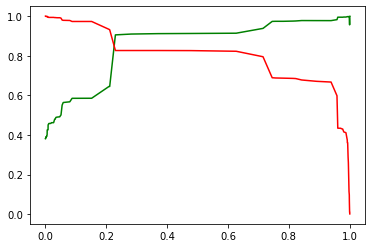

In [1064]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Prediction on Test Set

In [1065]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [1066]:
#Keeping only the required columns
X_test = X_test[col]
X_test.head()

,Lead Origin_Lead Add Form,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
7681,0,0,1,0,0,0,1,0,0,0,1,0,0
984,0,0,0,0,0,0,0,1,0,0,0,0,0
8135,0,0,1,0,0,0,1,0,0,0,0,0,0
6915,0,0,0,0,0,0,0,0,0,0,1,0,0
2712,0,0,0,0,0,0,0,0,0,0,0,1,0


In [1067]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [1068]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7681    0.055557
984     0.009561
8135    0.627055
6915    0.009310
2712    0.957932
244     0.009310
4698    0.211724
8287    0.051849
6791    0.957932
8970    0.027581
dtype: float64

In [1069]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7681,0.055557
984,0.009561
8135,0.627055
6915,0.009310
2712,0.957932


In [1070]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1071]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [1072]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1073]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1074]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.055557
1,0,984,0.009561
2,0,8135,0.627055
3,0,6915,0.009310
4,1,2712,0.957932


In [1075]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [1076]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.055557
1,0,984,0.009561
2,0,8135,0.627055
3,0,6915,0.009310
4,1,2712,0.957932


In [1077]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [1078]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.055557,6
1,984,0,0.009561,1
2,8135,0,0.627055,63
3,6915,0,0.009310,1
4,2712,1,0.957932,96


In [1079]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [1080]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.055557,6,0
1,984,0,0.009561,1,0
2,8135,0,0.627055,63,1
3,6915,0,0.009310,1,0
4,2712,1,0.957932,96,1


In [1081]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9013402829486225

In [1082]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1596,   80],
       [ 185,  825]], dtype=int64)

In [1083]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1084]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8168316831683168

In [1085]:
# Let us calculate specificity
TN / float(TN+FP)

0.9522673031026253

In [1086]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.9116022099447514

In [1087]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8168316831683168

<font color='blue'>
<h1> Observation: </h1>
After running the model on the Test Data these are the figures we obtain:

#### Final Precision on test - 91.16%
#### Final Recall Score on test - 81.68%

#### Train Data: 
*  Accuracy : 90.37%
*  Sensitivity : 82.68%
*  Specificity : 95.10%
#### Test Data: 
*  Accuracy : 90.13%
*  Sensitivity : 81.68%
*  Specificity : 95.22%
    
The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model.
 </font>